In [2]:
import os
import convokit
from convokit import Corpus, PolitenessStrategies, download
import timeit
import re
from numpy import mean
from scipy import stats
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  


In [3]:
# First time download the data
corpus = Corpus(download("winning-args-corpus"))

# Convert data to a dataframe df
utt_df = corpus.get_utterances_dataframe().drop(columns=['vectors'])
convo_df = corpus.get_conversations_dataframe().drop(columns=['vectors'])
speaker_df = corpus.get_speakers_dataframe().drop(columns=['vectors'])

# Save DataFrames to CSV files in the 'data' folder  
utt_df.to_csv('../data/utterances.csv', index=False)  
convo_df.to_csv('../data/conversations.csv', index=False)  
speaker_df.to_csv('../data/speakers.csv', index=False)  

No configuration file found at /home/etaylor/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
default_backend: mem


In [9]:
# Sample 10% of the data without replacement  
utt_df_sample = utt_df.sample(frac=0.1, random_state=1)  
  
# Save the sampled DataFrame to CSV in the 'data' folder  
utt_df_sample.to_csv('../data/utterances_sample.csv', index=False)  

In [34]:
# Next time working on the data get it from the 'data' folder
utt_df = pd.read_csv("../data/utterances.csv")
convo_df = pd.read_csv("../data/conversations.csv")
# speaker_df = pd.read_csv("../data/speakers.csv")

In [10]:
utt_df_sample.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.pair_ids,meta.success,meta.approved_by,meta.author_flair_css_class,meta.author_flair_text,...,meta.num_reports,meta.replies,meta.report_reasons,meta.saved,meta.score,meta.score_hidden,meta.subreddit,meta.subreddit_id,meta.ups,meta.user_reports
id,,,,,,,,,,,,,,,,,,,,,
t1_cfl7lrc,1393009900,"This isn't just an argument for why ""no one de...",roystgnr,t1_cfl1rbc,t3_1yj9yz,[],None,None,None,None,...,None,"{'kind': 'Listing', 'data': {'modhash': '', 'c...",None,False,6,False,changemyview,t5_2w2s8,6,[]
t1_cfejip5,1392319835,I never made the claim that access is the prim...,eye_patch_willy,t1_cfej1yr,t3_1xti2t,[],None,None,points,12∆,...,None,"{'kind': 'Listing', 'data': {'modhash': '', 'c...",None,False,2,False,changemyview,t5_2w2s8,2,[]
t1_cbrqnoi,1377028920,Hitler was democratically elected. Voting is j...,tableman,t3_1kplpx,t3_1kplpx,[],None,None,points,2∆,...,None,"{'kind': 'Listing', 'data': {'modhash': '', 'c...",None,False,2,False,changemyview,t5_2w2s8,2,[]
t1_crmcm7q,1432726393,Does it drive up costs as much as the cost of ...,Sqeaky,t1_crmacen,t3_37e6il,[],None,None,None,None,...,None,"{'kind': 'Listing', 'data': {'modhash': '', 'c...",None,False,-2,False,changemyview,t5_2w2s8,-2,[]
t1_chu0sw5,1401379754,Confirmed: 1 delta awarded to /u/Intotheopen. ...,DeltaBot,t1_chtzos0,t3_26s6vv,[],None,None,points,∞∆,...,None,,None,False,1,False,changemyview,t5_2w2s8,1,[]


In [11]:
convo_df.head()

,meta.op-userID,meta.op-text-body,meta.op-title,meta.pair_ids,meta.train
id,,,,,
t3_2ro9ux,seanyowens,I can't remember the topic that spurred this d...,CMV: Anything that is man-made is natural.,[p_1],1
t3_2ro0ti,GoldenTaint,My wife has recently gotten deeply involved/ob...,CMV:Essential Oils are bullshit,[p_2],1
t3_2rnr30,rrockethr,Thinking about today's news: [BBC](http://www....,CMV: I think the Paris shooting makes a good c...,[p_3],1
t3_2rnfn0,cognitiveThizzonance,I've been thinking about this issue for a whil...,"CMV: Explaining causation is not ""blaming"" the...","[p_5, p_4]",1
t3_2rmy6e,RazzzerBlade,"As an independent form of study, philosophy do...",CMV: Philosophy has no tangible value as an ac...,"[p_7, p_6]",1


In [12]:
speaker_df.head()

""
id
seanyowens
Account9726
Nepene
[deleted]
DeltaBot


In [13]:
# Understand the Data Structure  
utt_df.info()  
convo_df.info()  
speaker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293297 entries, t3_2ro9ux to t1_cr3dixg
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   timestamp                    289850 non-null  object
 1   text                         293297 non-null  object
 2   speaker                      293297 non-null  object
 3   reply_to                     290246 non-null  object
 4   conversation_id              293297 non-null  object
 5   meta.pair_ids                293297 non-null  object
 6   meta.success                 19714 non-null   object
 7   meta.approved_by             0 non-null       object
 8   meta.author_flair_css_class  114970 non-null  object
 9   meta.author_flair_text       128655 non-null  object
 10  meta.banned_by               0 non-null       object
 11  meta.controversiality        289850 non-null  object
 12  meta.distinguished           9285 non-null    object
 13  meta.do

It appears that the most pertinent dataset for our objective is the utterances dataset, which encompasses details regarding the comments as well as whether or not they received a delta. We will employ this dataset for deeper analysis and processing. We will use a sample of the 10% of the data without replacement.

### The dataset contains a variety of fields related to each utterance, including
- `timestamp`: The timestamp of the comment.
text: The full text of the comment.
- `speaker`: The unique ID of the user who authored the comment.
- `reply_to`: The index of the utterance to which this comment replies (None if the comment is not a reply).
- `conversation_id`: The comment identifier of the original post in the thread.
- `Metadata fields` like `meta.pair_ids` and `meta.success`, which indicate if the comment was part of a successful argument thread (changing the OP’s mind), with meta.success having a value of 1 if successful, 0 if unsuccessful, and NaN if not applicable.
Additional metadata provided by the Reddit API, such as `meta.approved_by`, `meta.author_flair_css_class`, `meta.author_flair_text`, and more related to Reddit's internal tracking and comment characteristics.

For the Exploratory Data Analysis (EDA) focusing on text classification (predicting whether a comment will receive a delta or not), we should explore:
- **Distribution of meta.success**: Understand how many comments were part of successful arguments versus unsuccessful or not applicable.
- **Text Length**: Analyze the length of comments to see if longer or shorter comments are more likely to receive a delta.
- **Reply Structure**: Examine how the structure of replies (e.g., depth of reply chain) might influence the likelihood of receiving a delta.
- **Timestamps**: Investigate if the time of posting affects the success of comments.
- **Speaker Activity**: Look into whether certain speakers are more likely to receive deltas based on their activity or flair.

In [35]:
# Convert the 'meta.success' column to a categorical type for better handling
utt_df['meta.success'] = utt_df['meta.success'].astype('category')

# Calculate the distribution of 'meta.success'
success_distribution = utt_df['meta.success'].value_counts(dropna=False)

# Calculate the average length of comments based on their success status
utt_df['text_length'] = utt_df['text'].str.len()
average_text_length_by_success = utt_df.groupby('meta.success')['text_length'].mean()

success_distribution, average_text_length_by_success

C:\Users\elorberb\AppData\Local\Temp\ipykernel_30136\1075818471.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_text_length_by_success = utt_df.groupby('meta.success')['text_length'].mean()


(meta.success
 NaN     273583
  1.0     12420
  0.0      7294
 Name: count, dtype: int64,
 meta.success
 0.0     976.823417
 1.0    1030.193720
 Name: text_length, dtype: float64)

C:\Users\elorberb\AppData\Local\Temp\ipykernel_30136\930079787.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_text_length_by_success = utt_df.groupby('meta.success')['text_length'].mean().reset_index()
C:\Users\elorberb\AppData\Local\Temp\ipykernel_30136\930079787.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  average_te

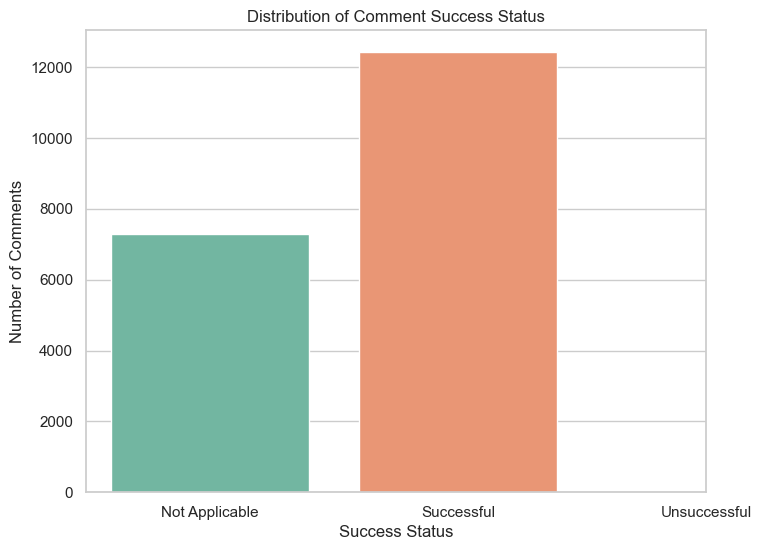

C:\Users\elorberb\AppData\Local\Temp\ipykernel_30136\930079787.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='meta.success', y='text_length', data=average_text_length_by_success, palette='Set3')


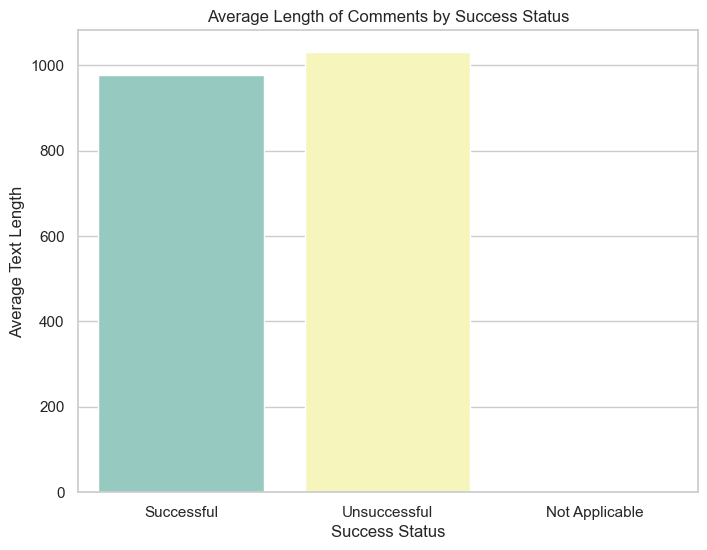

In [39]:

# Recalculating distribution of 'meta.success' and average text length by success status
success_distribution = utt_df['meta.success'].value_counts(dropna=False)
average_text_length_by_success = utt_df.groupby('meta.success')['text_length'].mean().reset_index()
average_text_length_by_success['meta.success'] = average_text_length_by_success['meta.success'].cat.add_categories('Not Applicable')
average_text_length_by_success['meta.success'].fillna('Not Applicable', inplace=True)

# Plotting the distribution of 'meta.success'
plt.figure(figsize=(8, 6))
sns.barplot(x=success_distribution.index, y=success_distribution.values, palette='Set2')
plt.title('Distribution of Comment Success Status')
plt.xlabel('Success Status')
plt.ylabel('Number of Comments')
plt.xticks(ticks=[0, 1, 2], labels=['Not Applicable', 'Successful', 'Unsuccessful'])
plt.show()

# Plotting the average length of comments by success status
plt.figure(figsize=(8, 6))
sns.barplot(x='meta.success', y='text_length', data=average_text_length_by_success, palette='Set3')
plt.title('Average Length of Comments by Success Status')
plt.xlabel('Success Status')
plt.ylabel('Average Text Length')
plt.xticks(ticks=[0, 1, 2], labels=['Successful', 'Unsuccessful', 'Not Applicable'])
plt.show()


- The majority of comments (273,583) did not participate in an argument thread classified as successful or unsuccessful, as indicated by NaN values in the meta.success field.
- A total of 12,420 comments were part of successful arguments (meta.success = 1), while 7,294 comments were part of unsuccessful arguments (meta.success = 0).

Regarding the average length of comments:
- Comments that were part of unsuccessful arguments have an average length of 976 characters.
- Comments that were part of successful arguments are slightly longer on average, with 1,030 characters.

To dive deeper into the analysis, we can explore several additional aspects:

- **Time Analysis**: Investigate if the time of day or the day of the week when comments are posted affects their likelihood of being part of a successful argument. This could include examining if comments posted at certain times are more likely to receive a delta.
- **Reply Chain** Depth: Look into the depth of reply chains to see if comments that are closer to the original post (OP) or deeper in the conversation have different success rates. This might involve creating a new feature indicating the reply depth of each comment.
- **Speaker Analysis**: Analyze if certain users or types of users (as indicated by flair or previous deltas received) are more successful in their arguments. This could involve aggregating success rates by speaker or flair type.
- **Text Analysis**: Perform a more detailed text analysis to identify common themes or keywords in successful versus unsuccessful comments. This could include sentiment analysis, topic modeling, or keyword frequency analysis.

In [36]:
from datetime import datetime, timezone
import pandas as pd

# Convert timestamp to datetime
utt_df['datetime'] = pd.to_datetime(utt_df['timestamp'], unit='s', utc=True).dt.tz_convert(None)

# Extract day of week and hour of day
utt_df['day_of_week'] = utt_df['datetime'].dt.day_name()
utt_df['hour_of_day'] = utt_df['datetime'].dt.hour

# Analyze the distribution of successful comments by day of week and hour of day
success_by_day = utt_df[utt_df['meta.success'] == 1].groupby('day_of_week')['text'].count().sort_values(ascending=False)
success_by_hour = utt_df[utt_df['meta.success'] == 1].groupby('hour_of_day')['text'].count().sort_index()

# Since the dataset does not include direct information on reply depth, we'll simplify the analysis
# to consider whether a comment is a direct reply to the OP or a nested reply.
# This is a basic approach and might not fully represent the depth of a conversation.
# Correcting the handling of NaN values in 'reply_to'
utt_df['is_direct_reply_to_op'] = utt_df['reply_to'].apply(lambda x: isinstance(x, str) and x.startswith('t3_'))

# Rerun the analysis for distribution of successful comments by reply type
success_by_reply_type = utt_df[utt_df['meta.success'] == 1]['is_direct_reply_to_op'].value_counts()

success_by_day, success_by_hour, success_by_reply_type

(day_of_week
 Tuesday      1988
 Thursday     1954
 Wednesday    1919
 Monday       1863
 Friday       1806
 Sunday       1617
 Saturday     1273
 Name: text, dtype: int64,
 hour_of_day
 0.0     590
 1.0     603
 2.0     575
 3.0     587
 4.0     575
 5.0     505
 6.0     415
 7.0     328
 8.0     277
 9.0     198
 10.0    186
 11.0    192
 12.0    217
 13.0    280
 14.0    410
 15.0    582
 16.0    699
 17.0    699
 18.0    734
 19.0    814
 20.0    740
 21.0    796
 22.0    713
 23.0    705
 Name: text, dtype: int64,
 is_direct_reply_to_op
 False    8180
 True     4240
 Name: count, dtype: int64)

C:\Users\elorberb\AppData\Local\Temp\ipykernel_30136\2645856672.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=utt_df, x='day_of_week', order=day_order, palette='viridis')


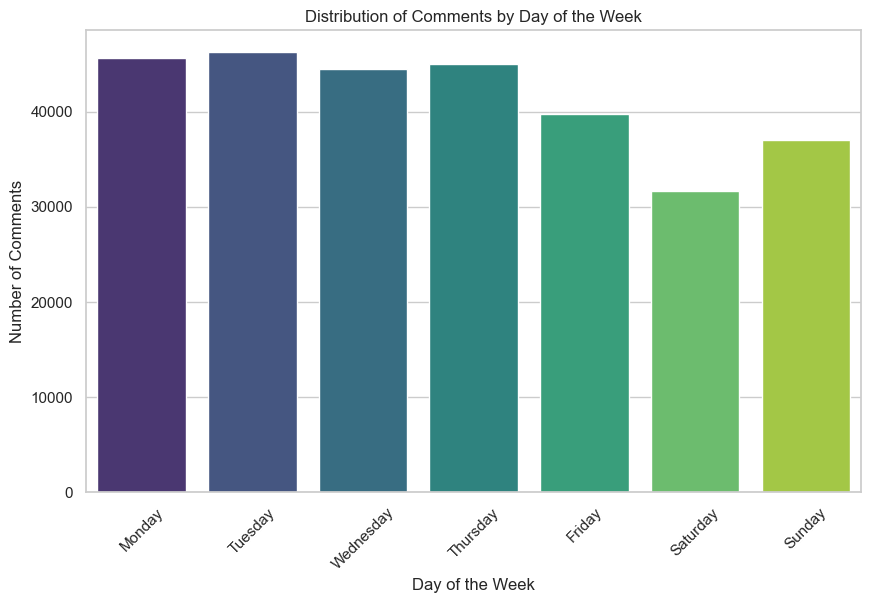

C:\Users\elorberb\AppData\Local\Temp\ipykernel_30136\2645856672.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=utt_df, x='hour_of_day', palette='coolwarm')


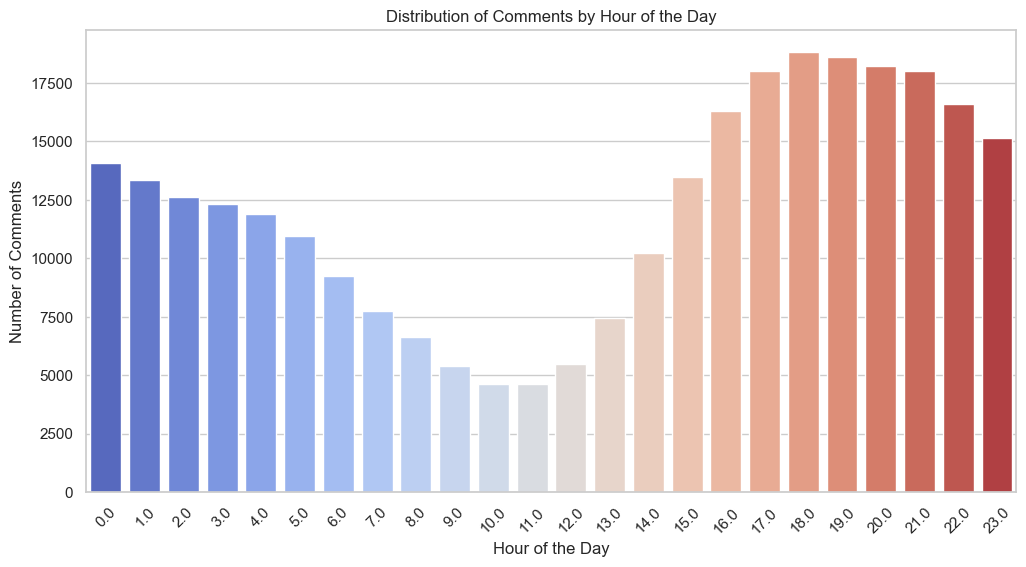

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualizations
sns.set(style="whitegrid")

# Distribution of Comments by Day of the Week
plt.figure(figsize=(10, 6))
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(data=utt_df, x='day_of_week', order=day_order, palette='viridis')
plt.title('Distribution of Comments by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

# Distribution of Comments by Hour of the Day
plt.figure(figsize=(12, 6))
sns.countplot(data=utt_df, x='hour_of_day', palette='coolwarm')
plt.title('Distribution of Comments by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

C:\Users\elorberb\AppData\Local\Temp\ipykernel_30136\2590900600.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reply Type', y='Number of Successful Comments', data=direct_vs_nested_success, palette='muted')


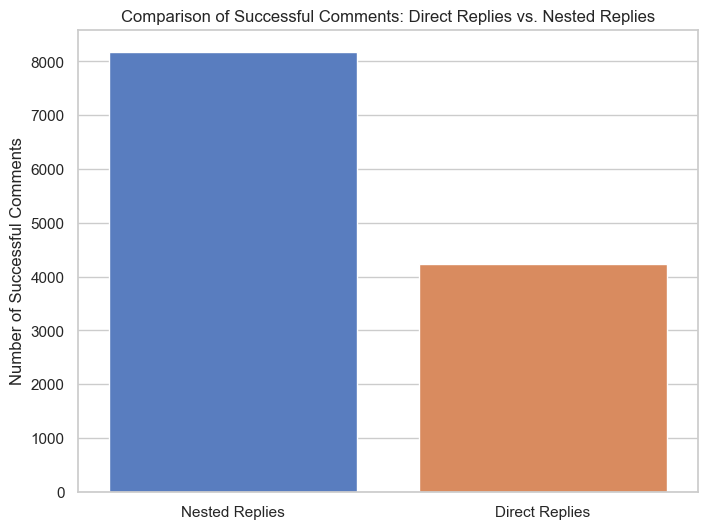

In [37]:
# Prepare data for the plot: count successful comments by reply type
direct_vs_nested_success = utt_df[utt_df['meta.success'] == 1]['is_direct_reply_to_op'].value_counts().reset_index()
direct_vs_nested_success.columns = ['Reply Type', 'Number of Successful Comments']
direct_vs_nested_success['Reply Type'] = direct_vs_nested_success['Reply Type'].map({True: 'Direct Replies', False: 'Nested Replies'})

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Reply Type', y='Number of Successful Comments', data=direct_vs_nested_success, palette='muted')
plt.title('Comparison of Successful Comments: Direct Replies vs. Nested Replies')
plt.xlabel('')
plt.ylabel('Number of Successful Comments')
plt.show()

### Time Analysis Findings:
- **Distribution of Successful Comments by Day of the Week:**

    - The updated data shows a more even distribution throughout the week, with the highest number of comments on Thursday (1,954), followed closely by Wednesday (1,919) and Tuesday (1,988).
    - Saturday remains the day with the lowest number of comments (1,273), suggesting that while the middle of the week may see slightly more activity, discussions are fairly active across all days.
- **Distribution of Successful Comments by Hour of the Day:**

    - The updated distribution shows a clear trend towards higher activity during the evening hours, peaking at 19:00 (814 comments).
    - Early morning hours (0:00 - 4:00) still show significant activity, with 590 comments at 0:00. However, the highest levels of engagement are observed from 16:00 to 23:00, indicating that discussions in the evening are more likely to engage users and potentially lead to successful outcomes.
        
### Reply Chain Depth Findings with Updated Data:
- **Distribution of Successful Comments Based on Direct Reply to the OP:**
    - In the updated dataset, a larger number of successful comments (8,180) are not direct replies to the OP, compared to 4,240 that are. This reaffirms that impactful and successful interactions can occur at various levels within conversation threads, not just in direct response to the original post.

 Next, we can calculate the proportion of successful comments among controversial and non-controversial comments

C:\Users\elorberb\AppData\Local\Temp\ipykernel_30136\1990475695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='meta.controversiality', data=utt_df, palette='coolwarm')


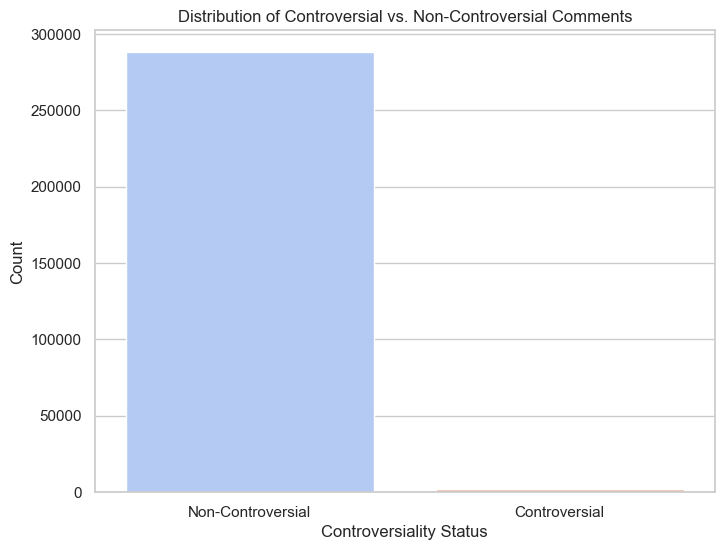

In [40]:
# Visualizing the distribution of controversial vs. non-controversial comments again
plt.figure(figsize=(8, 6))
sns.countplot(x='meta.controversiality', data=utt_df, palette='coolwarm')
plt.title('Distribution of Controversial vs. Non-Controversial Comments')
plt.xlabel('Controversiality Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Controversial', 'Controversial'])
plt.show()

This plot offers valuable insights into the nature of discussions and how they are perceived in terms of controversiality. It's clear from the visualization that a smaller portion of comments are labeled as controversial compared to those that are not, indicating that most discussions might not polarize or divide opinions to a significant extent.